In [1]:
"""Notebook with basic EDA graphics."""

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../data/train_data.csv")  # Локальный клон
df.head()

,key,genre,audio_path,album_name,album_id,album_release_date,artist_name,artist_id,track_id,track_name,...,sections_mean_mode,sections_mean_time_signature,segments_number,segments_mean_duration,segments_mean_pitch,segments_max_pitch,segments_min_pitch,segments_mean_timbre,segments_max_timbre,segments_min_timbre
0,61_HighwayCorey_Harris,acoustic,tracks/acoustic/61_HighwayCorey_Harris/audio.mp3,Between Midnight And Day,6fuRNpnOE7QgyT1IcdvpED,1995-10-31,['Corey Harris'],['1TQtbRQbaXw5CeN3mC0DJH'],3zGcBpopIzVBqqHRoRTCR2,61 Highway,...,1.0,4.0,780.0,0.318523,0.255563,1.0,0.039800,-5.691454,66.999615,-89.520079
1,A_Rat_In_My_DreamBlackbird_Raum,acoustic,tracks/acoustic/A_Rat_In_My_DreamBlackbird_Rau...,Swidden,2FQOhgfjT2SY5ftlJPo2J0,2010-10-05,['Blackbird Raum'],['2OX8UjaYkhqkZN9n7kbQLx'],6f3gH7xUWu2maSO8pMWza0,A Rat In My Dream,...,1.0,2.0,143.0,0.350626,0.296862,1.0,0.060042,10.736050,63.383944,-47.035636
2,A_Whole_New_WorldDisney_Peaceful_Guitar,acoustic,tracks/acoustic/A_Whole_New_WorldDisney_Peacef...,Disney Guitar: Breathe,1BkRLMg1PwegXipKVRXeiI,2020-08-07,"['Disney Peaceful Guitar', 'Disney']","['3oqzxUlHhjJ7auI4dVujKX', '3xvaSlT4xsyk6lY1ES...",4PMQ9IidXtvDdhmlH4IBPD,A Whole New World,...,1.0,4.0,289.0,0.526282,0.207748,1.0,0.020567,-1.118421,50.936284,-87.081986
3,Ab's_SongIron_&_Wine,acoustic,tracks/acoustic/Ab's_SongIron_&_Wine/audio.mp3,Sing Into My Mouth,0jMBAo2pk2cEE0aJ3WseMl,2015-07-17,"['Iron & Wine', 'Ben Bridwell']","['4M5nCE77Qaxayuhp3fVn4V', '6Vfn70eqp3AgtiZZtQ...",0lovF4eevVqfpVRNYzfmmV,Ab's Song,...,1.0,3.0,211.0,0.342537,0.253138,1.0,0.044284,-0.789037,50.828991,-54.978156
4,Across_the_BorderlineRy_Cooder,acoustic,tracks/acoustic/Across_the_BorderlineRy_Cooder...,Music by Ry Cooder,0gLaTb6BP8pySUWwkiZjdD,1995-01-01,['Ry Cooder'],['1CPwHx5lgVxv0rfcp7UXLx'],64CFnGFSt0rzznXD2XUGUQ,Across the Borderline,...,1.0,4.0,496.0,0.325967,0.280055,1.0,0.062054,-1.680980,47.055127,-64.809298


Text(0, 0.5, 'Количество объектов')

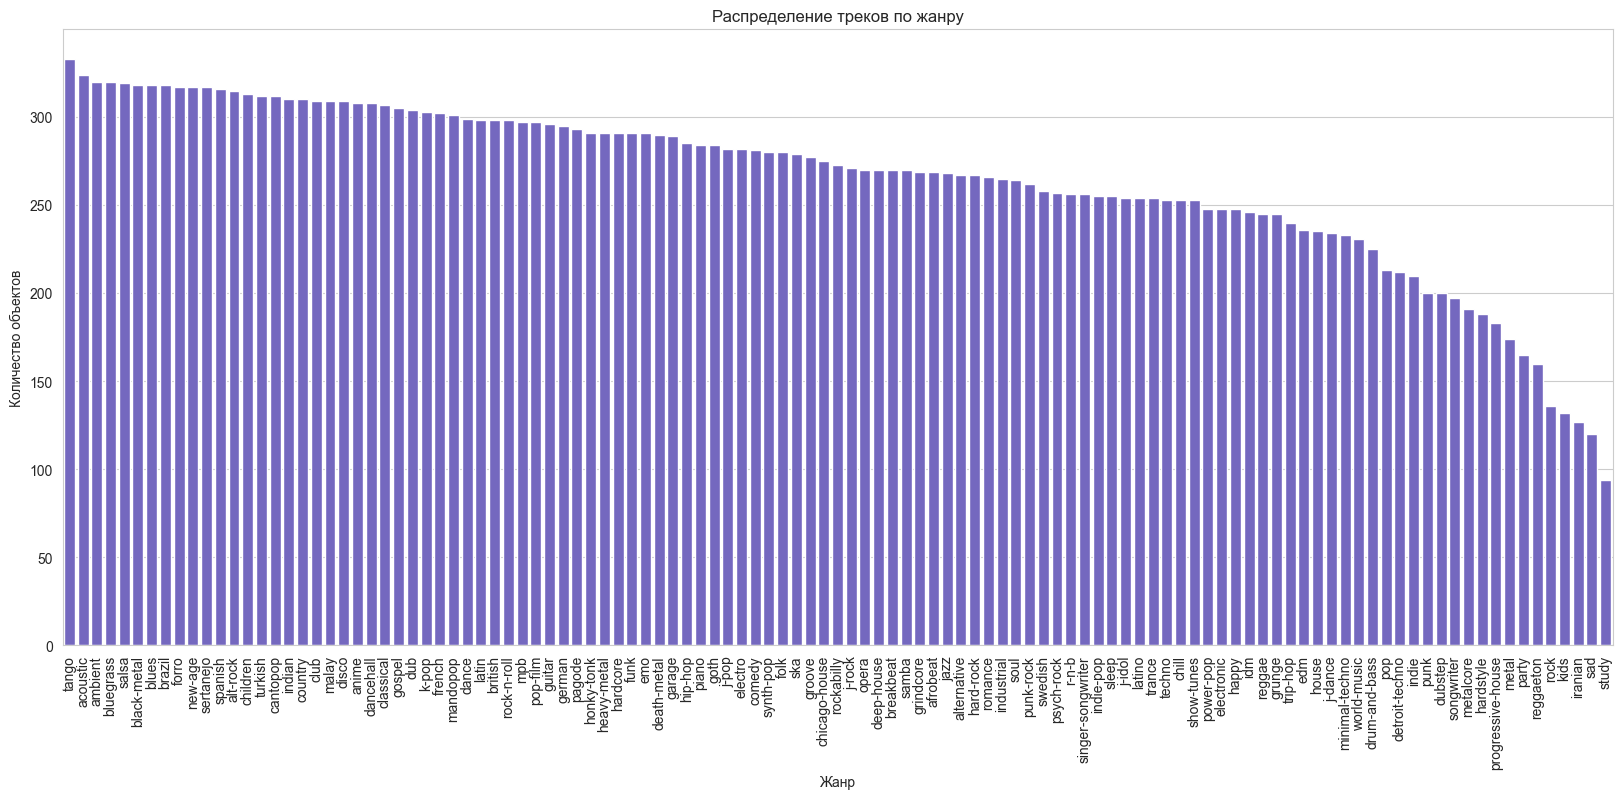

In [3]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(
    data=df.sort_values(by="genre"),
    x="genre",
    ax=ax,
    order=df['genre'].value_counts().index,
    color="slateblue",
)

ax.xaxis.set_tick_params(rotation=90)
ax.set_title("Распределение треков по жанру")
ax.set_xlabel("Жанр")
ax.set_ylabel("Количество объектов")

Text(0, 0.5, 'Количество объектов')

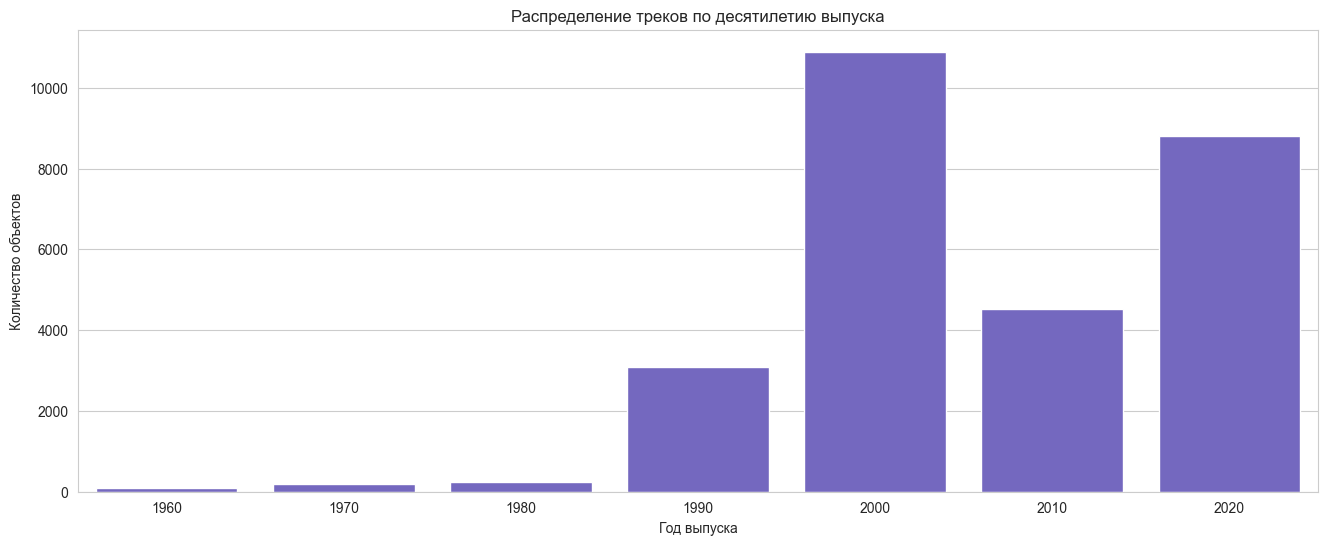

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))

df_plot = df.copy()
df_plot.dropna(subset=["album_release_date"], inplace=True)
bad_date = df_plot["album_release_date"].str.fullmatch("\d{4}-\d{2}-\d{2}") != True  # noqa
df_plot.loc[bad_date, "album_release_date"] = df_plot.loc[bad_date, "album_release_date"].str[:10]

df_plot["year"] = ((pd.to_datetime(df_plot["album_release_date"]).dt.year / 10).round() * 10).astype(int)

sns.countplot(data=df_plot[df_plot["year"] >= 1960], x="year", ax=ax, color="slateblue",)

ax.set_title("Распределение треков по десятилетию выпуска")
ax.set_xlabel("Год выпуска")
ax.set_ylabel("Количество объектов")

Text(0.5, 0.98, 'Распределение треков по длительности в секундах')

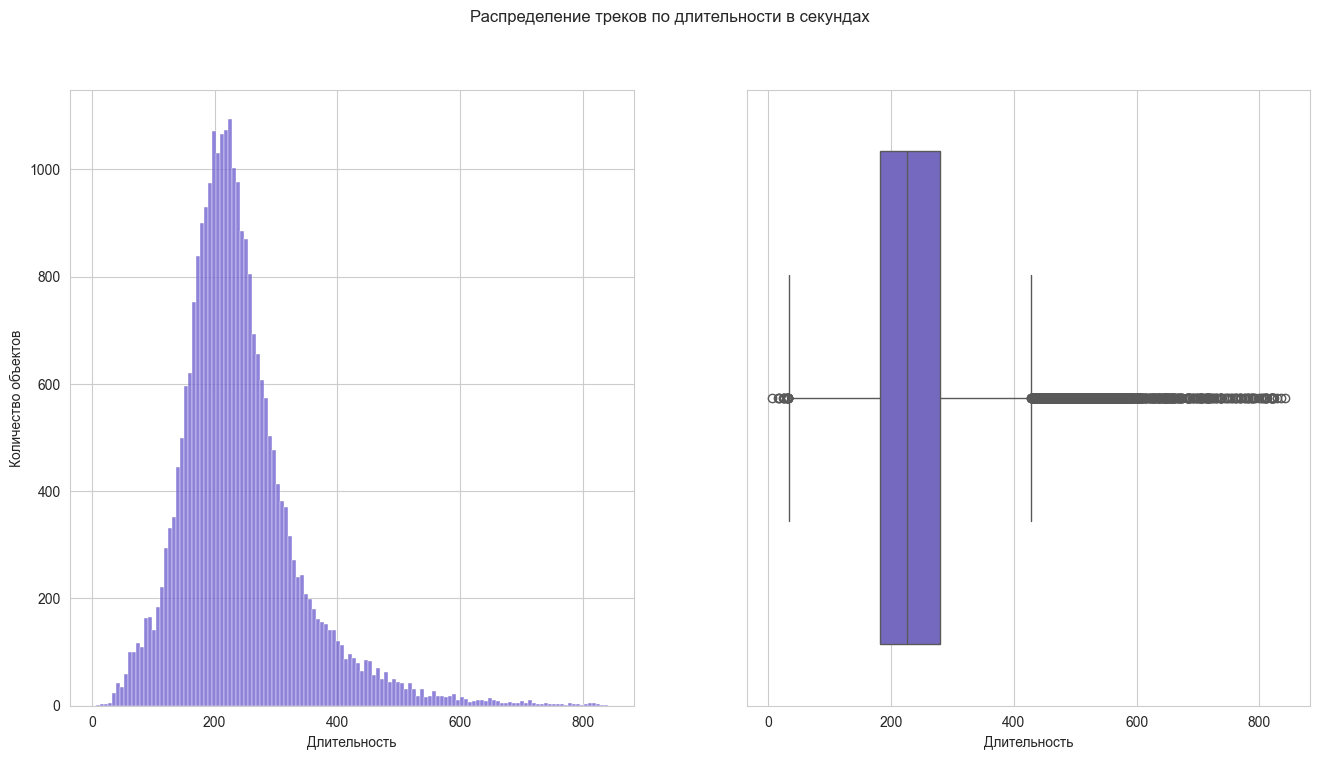

In [5]:
df_plot = df.copy()
q = df_plot["duration_ms"].quantile(q=0.996)
df_plot = df_plot[df_plot.duration_ms <= q]
df_plot["duration_ms"] /= 1000  # в секунды

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(data=df_plot, x="duration_ms", ax=ax[0], color="slateblue")

# ax[0].set_title("Распределение треков по десятилетию выпуска")
ax[0].set_xlabel("Длительность")
ax[0].set_ylabel("Количество объектов")

sns.boxplot(data=df_plot, x="duration_ms", ax=ax[1], color="slateblue", orient="h")

# ax[0].set_title("Распределение треков по десятилетию выпуска")
ax[1].set_xlabel("Длительность")

fig.suptitle("Распределение треков по длительности в секундах")

Text(0, 0.5, 'Энергия')

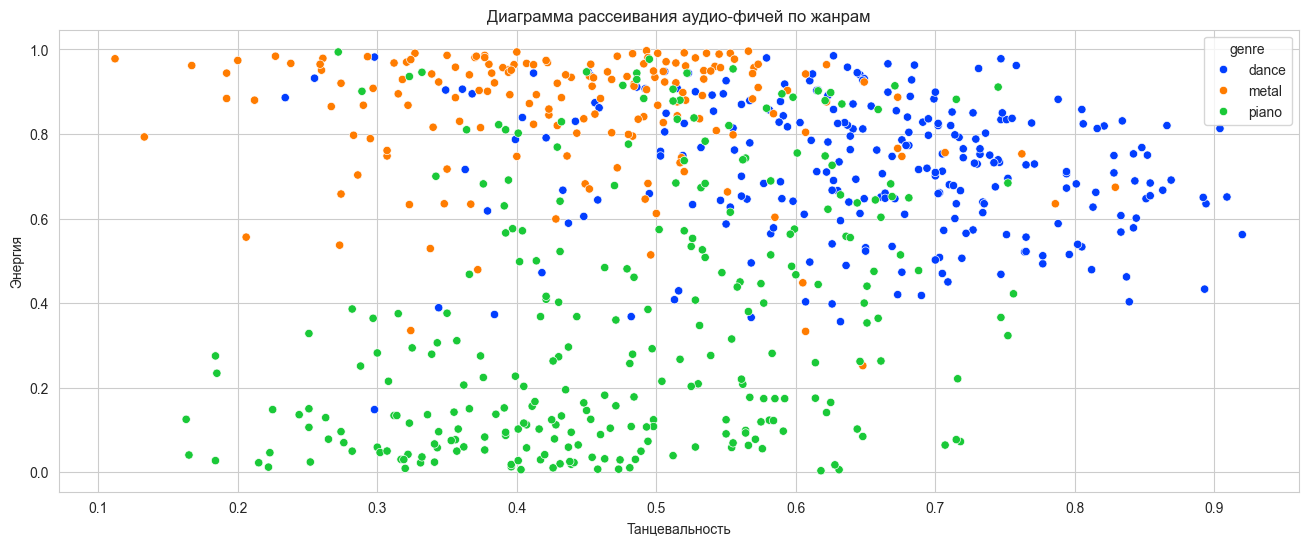

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))

genres = ["dance", "metal", "piano"]

sns.scatterplot(data=df[df.genre.isin(genres)], x="danceability", y="energy", ax=ax, hue="genre", palette="bright")

ax.set_title("Диаграмма рассеивания аудио-фичей по жанрам")
ax.set_xlabel("Танцевальность")
ax.set_ylabel("Энергия")